# Sheet 1 - Solution

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1 Principal Component Analysis
### a

In [2]:
# TODO: implement PCA (fill in the blanks in the function below)

# DONE

def pca(data, n_components=None, printEig=False):
    """
    Principal Component Analysis on a p x N data matrix.
    
    Parameters
    ----------
    data : np.ndarray
        Data matrix of shape (p, N).
    n_components : int, optional
        Number of requested components. By default returns all components.
    printEig: bool, if true, prints extra info about eigenvalues
        
    Returns
    -------
    np.ndarray, np.ndarray
        the pca components (shape (n_components, p)) and the projection (shape (n_components, N))

    """
    p = data.shape[0]
    n = data.shape[1]
    
    # set n_components to p by default
    n_components = p if n_components is None else n_components
    assert n_components <= data.shape[0], f"Got n_components larger than dimensionality of data!"
    
    # center the data
    mu = data.mean(axis=1)
    data = data - mu.reshape(p,1)
    
    # compute X times X transpose
    cov = np.matmul(data, data.transpose())
    
    # compute the eigenvectors and eigenvalues
    eigVal, eigVec = np.linalg.eig(cov)
    
    # sort the eigenvectors by eigenvalue and take the n_components largest ones
    if printEig:
        print(f"eigenvalues and sorted indices of {n_components} largest eigenvalues")
        print(eigVal)
    sort = np.argsort(eigVal)[-1:-n_components-1:-1] # get n_components sorted indices in descending order
    if printEig:
        print(sort)
    wTLambda = eigVal[sort]
    wT = eigVec[:,sort]
    components = wT.transpose()
    
    # compute X_projected, the projection of the data to the components
    X_projected = np.matmul(components,data)
    
    return components, X_projected  # return the n_components first components and the pca projection of the data

In [3]:
# Example data to test your implementation 
# All the asserts on the bottom should go through if your implementation is correct

data = np.array([
    [ 1,  0,  0, -1,  0,  0],
    [ 0,  3,  0,  0, -3,  0],
    [ 0,  0,  5,  0,  0, -5]
], dtype=np.float32)

# add a random offset to all samples. it should not affect the results
data += np.random.randn(data.shape[0], 1)

n_components = 2
components, projection = pca(data, n_components=n_components)  # apply your implementation

# the correct results are known (up to some signs)
true_components = np.array([[0, 0, 1], [0, 1, 0]], dtype=np.float32)
true_projection = np.array([
    [ 0,  0,  5,  0,  0, -5],
    [ 0,  3,  0,  0, -3,  0]
], dtype=np.float32)

# check that components match, up to sign
assert isinstance(components, np.ndarray), f'Expected components to be numpy array but got {type(components)}'
assert components.shape == true_components.shape, f'{components.shape}!={true_components.shape}'
assert np.allclose(np.abs(components * true_components).sum(1), np.ones(n_components)), f'Components not matching'

# check that projections agree, taking into account potentially flipped components
assert isinstance(projection, np.ndarray), f'Expected projection to be numpy array but got {type(projection)}'
assert projection.shape == (n_components, data.shape[1]), f'Incorrect shape of projection: Expected {(n_components, data.shape[1])}, got {projection.shape}'
assert np.allclose(projection, true_projection * (components * true_components).sum(1, keepdims=True), atol=1e-6), f'Projections not matching'

print('Test successful!')

Test successful!


### b
Load the data (it is a subset of the data at https://opendata.cern.ch/record/4910#)

In [4]:
features = np.load('data/dijet_features.npy')
labels = np.load('data/dijet_labels.npy')
label_names = ['b', 'c', 'q']  # bottom, charm or light quarks

print(f'{features.shape=}, {labels.shape=}')  # print the shapes
d = features.shape[0]
n = features.shape[1]

# TODO: print how many samples of each class are present in the data (hint: numpy.unique)
print("-----------------------------------------------")
print("labels and how many times they occured:")
print(np.unique(labels,return_counts=True))

# range of the different features
feat_min = np.min(features, axis=1)
feat_max = np.max(features, axis=1)

features.shape=(116, 2233), labels.shape=(2233,)
-----------------------------------------------
labels and how many times they occured:
(array([0., 1., 2.]), array([999, 864, 370]))


Normalize the data

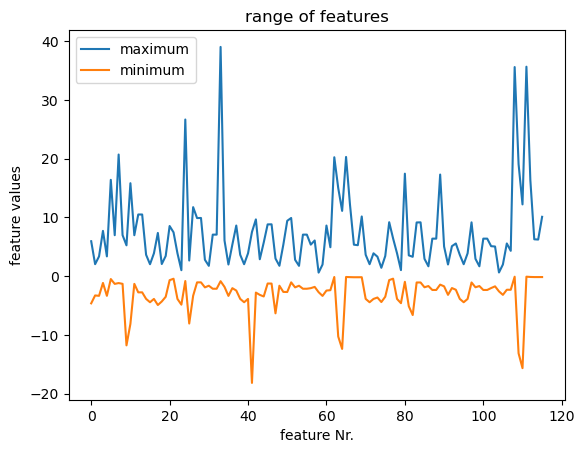

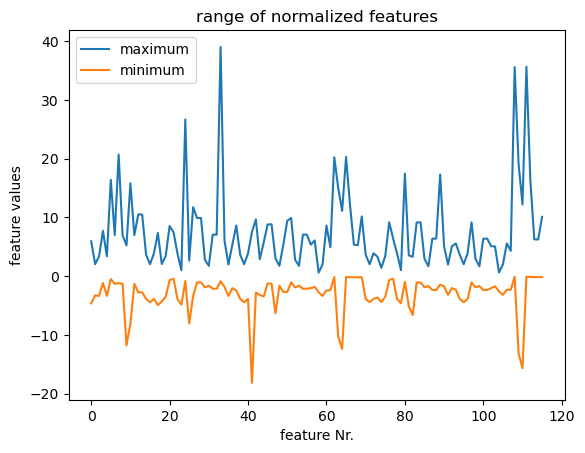

In [23]:
# TODO: report range of features and normalize the data to zero mean and unit variance

#DONE

# range of features:
plt.title("range of features")
plt.xlabel("feature Nr.")
plt.ylabel("feature values")
plt.plot(feat_max,label="maximum")
plt.plot(feat_min,label="minimum")
plt.legend()
plt.show()

# normalizing
# variance
feat_std = features.std(axis=1)
features = features / feat_std.reshape(d,1)
# mean
feat_mu = features.mean(axis=1)
feat = features - feat_mu.reshape(d,1)

# range of the different normalized features
feat_min = np.min(feat, axis=1)
feat_max = np.max(feat, axis=1)
# range of normmalized features:
plt.title("range of normalized features")
plt.xlabel("feature Nr.")
plt.ylabel("feature values")
plt.plot(feat_max,label="maximum")
plt.plot(feat_min,label="minimum")
plt.legend()
plt.show()

### c

In [17]:
n_components = 2
w, feat_p = pca(feat, n_components=n_components)

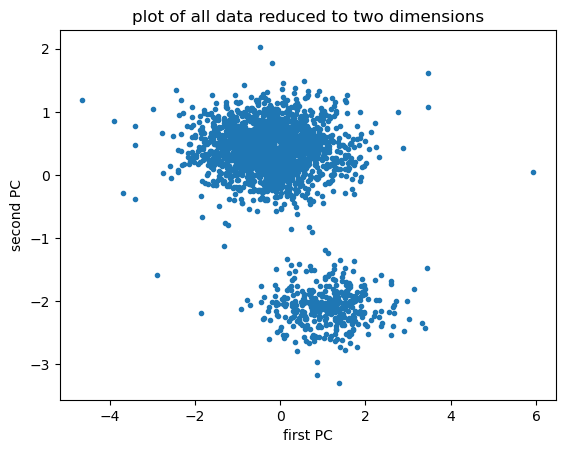

In [18]:
plt.title("plot of all data reduced to two dimensions")
plt.xlabel("first PC")
plt.ylabel("second PC")
plt.scatter(feat[0],feat[1],marker='.')
plt.show()

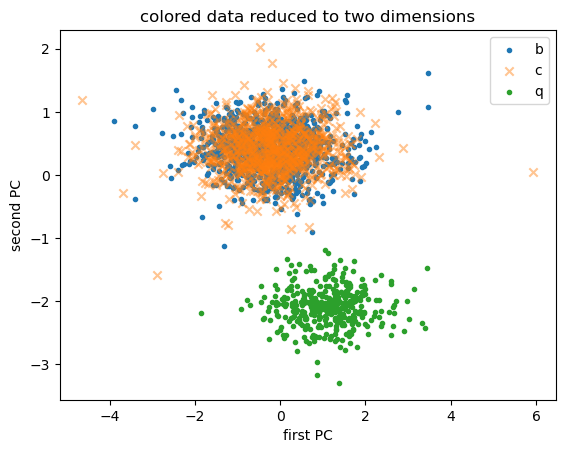

In [24]:
# dicerning different classes
m = {}
featC = {}
alpha = {0:1, 1:0.45, 2:1}
mark = {0:'.', 1:'x', 2:'.'}
for i in range(3):
    m[i] = labels==i
    featC[i] = feat[:,m[i]]

plt.title("colored data reduced to two dimensions")
plt.xlabel("first PC")
plt.ylabel("second PC")
for i in range(3):
    plt.scatter(featC[i][0],featC[i][1],marker=mark[i],
                label=label_names[i],alpha=alpha[i])
plt.legend()
plt.show()

The reduced data shows to distinct clusters. Without the distinction through coloring one could guess, that the big cluster is actually two clusters close together. But it might as well be that this cluster just happens to be larger than the other one.

## 2 Robust PCA

### a

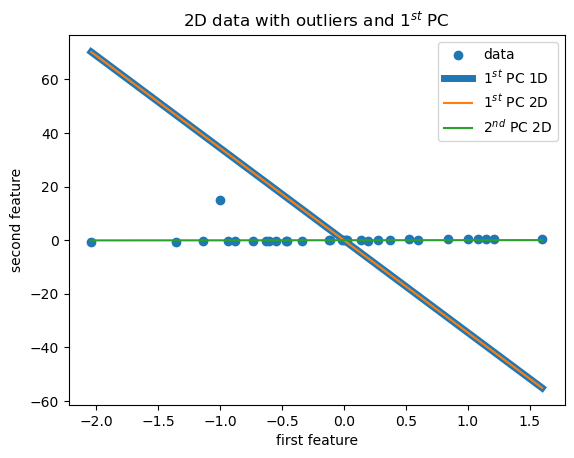

In [38]:
# load data
data = np.load('data/robust_pca_data.npy')

# TODO: Perform standard PCA and plot the first principal component in a scatter plot of the data
# pca. The appended 2 in the names indicates Nr.2
# the implemented pca centers the data anyways already

w2_2, data_p2_2 = pca(data, n_components=2)
w2, data_p2 = pca(data, n_components=1)

# 1st feature points for plot of 1st PC
xPC1 = np.linspace(data[0].min(),data[0].max())
yPC1 = w2[0,1]/w2[0,0]*xPC1
yPC1_2 = w2_2[0,1]/w2_2[0,0]*xPC1
yPC2_2 = w2_2[1,1]/w2_2[1,0]*xPC1

plt.title(r"2D data with outliers and $1^{st}$ PC")
plt.xlabel("first feature")
plt.ylabel("second feature")
plt.scatter(data[0],data[1],label="data")
plt.plot(xPC1,yPC1,label=r"$1^{st}$ PC 1D",linewidth=5)
plt.plot(xPC1,yPC1_2,label=r"$1^{st}$ PC 2D")
plt.plot(xPC1,yPC2_2,label=r"$2^{nd}$ PC 2D")
plt.legend()
plt.show()

### b

In [ ]:
# TODO: Compute the first principal component in a robust way: Use the Tukey potential with the scale
# parameter s = on the distances. Parameterize the line with the angle φ to the x-axis. Plot the error
# as a function of φ. Interpret the two minima.

### c

In [ ]:
# TODO: Plot the potential in the scatter plot for the two minima $\varphi^*$.